### The goal of this notebook is to plot a theorical separation curve between two classes of points. The separation curve is defined by a function involving euclidean polynomials.

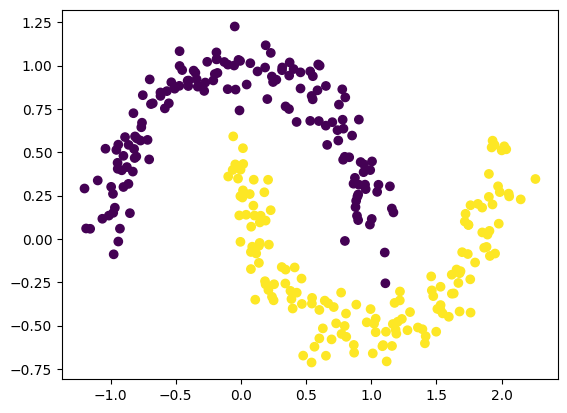

In [11]:
# import librairies
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_moons

# plot data
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [5]:
# Defining euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

#test distance
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
print(euclidean_distance(x1, x2))

5.196152422706632


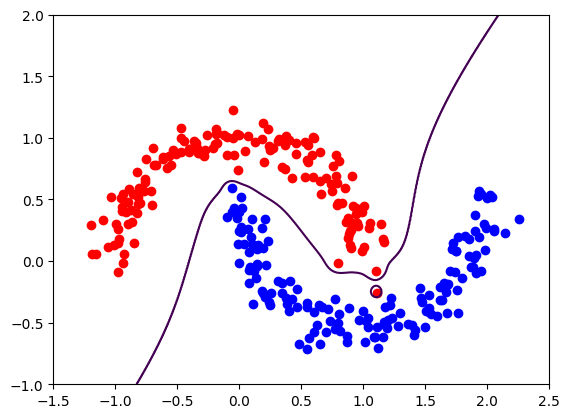

In [12]:
# Defining the function f_AB which provides a separating hyperplane between two classes A and B

def f_AB(x, A, B):
    sumB = sum([1/euclidean_distance(x, xB)**2 for xB in B])
    sumA = sum([1/euclidean_distance(x, xA)**2 for xA in A])
    prodAuB = np.prod([euclidean_distance(x, xB)**2 for xB in B]) * np.prod([euclidean_distance(x, xA)**2 for xA in A])
    return (sumA - sumB) * prodAuB



X0 = X[y==0]
X1 = X[y==1]


# Now plots all the points were f_AB(x) = 0 with class A = X0 and class B = X1
# We will use a grid of points to plot the curve
# We will use the function f_AB to determine the points of the grid that are on the curve
# We will use the function contour to plot the curve

# define the grid
x1_grid = np.linspace(-1.5, 2.5, 600)
x2_grid = np.linspace(-1, 2, 600)
# create the grid
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)
# compute the function f_AB on the grid
Z = np.array([f_AB(np.array([x1, x2]), X0, X1) for x1, x2 in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
Z = Z.reshape(X1_grid.shape)
# plot the contour
plt.contour(X1_grid, X2_grid, Z, levels=[0])
# plot the data
plt.scatter(X0[:,0], X0[:,1], c='r')
plt.scatter(X1[:,0], X1[:,1], c='b')
plt.show()


